## Notes

### Import libraries and read data

In [1]:
import pandas as pd
import numpy as np
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys

#input_data_ordered_raw =  pd.read_csv('rnap_scanned_over_ecoli_genome200k.csv')
input_data_ordered_raw = pd.read_csv('GFPdata.tsv',sep='\t')
#sequences = input_data_ordered_raw['seq'].tolist()

In [2]:
input_data_ordered_raw.head()

,AAsequence,HammingDistance,aaMutations,medianBrightness,std
0,KGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFIC...,0,NaN,3.719212,0.106992
1,KGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFIC...,1,SA108D,1.301030,NaN
2,KGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFIC...,5,SA108D:SN144D:SI186V:SM231T:SL234P,1.301031,NaN
3,KGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFIC...,4,SA108D:SY141N:SH146L:SE220G,1.301189,NaN
4,KGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFIC...,1,SA108G,3.708478,0.020613


In [3]:
# sequence length = 233
len(input_data_ordered_raw)

54025

In [4]:
import os
os.getcwd()

'/Users/tareen/Desktop/Desktop_Tests/MPathic3/mpathic/data/rnap_convnet/ANN_Logisitc_Regression/global_epistasis_gfp'

## Start model visualization

### Gauge Fixed learned model

In [195]:
#learned_model_im = pd.read_csv('learn_gfp_model.csv',sep='\t')
learned_model_im = pd.read_csv('learn_gfp_model_no_spurious_seqs.csv',sep='\t')
del learned_model_im['Unnamed: 0']
learned_model_im = learned_model_im[['val_*', 'val_A', 'val_C', 'val_D', 'val_E', 'val_F', 'val_G',
       'val_H', 'val_I', 'val_K', 'val_L', 'val_M', 'val_N', 'val_P', 'val_Q',
       'val_R', 'val_S', 'val_T', 'val_V', 'val_W', 'val_Y']]
learned_model_im.head()

,val_*,val_A,val_C,val_D,val_E,val_F,val_G,val_H,val_I,val_K,...,val_M,val_N,val_P,val_Q,val_R,val_S,val_T,val_V,val_W,val_Y
0,0.079593,0.354082,-0.871821,-0.224570,0.079593,0.249965,-0.071553,0.693647,0.443850,0.079593,...,0.079593,0.079593,-0.820558,0.079593,0.079593,-0.207272,0.079593,-0.155657,0.264648,0.079525
1,-0.406579,0.052410,0.052410,0.052410,0.738855,-0.264712,0.052410,0.044157,0.727726,0.208253,...,-0.490917,0.052410,-1.076783,-0.125079,0.055155,0.052410,-0.053454,0.052410,-0.323084,0.053294
2,-0.125839,-0.125839,-0.149358,-0.125839,-0.125839,-0.052105,-0.125839,-0.870204,-0.292620,-0.125839,...,0.065144,0.365795,0.143709,-0.125839,-0.125839,1.224494,0.169812,-0.125839,0.852866,-0.126541
3,0.113023,0.113023,0.799074,0.113023,0.113023,-0.034057,0.113023,0.057948,-0.739945,0.113023,...,-0.238425,-0.842181,-0.154680,0.113023,0.113023,0.369037,-0.654067,0.113023,0.047117,0.113166
4,0.808456,-1.042736,0.253991,0.192216,-0.282475,-0.153037,-0.428066,0.193667,0.050763,-0.096310,...,0.095229,-0.466739,0.095229,0.095229,0.095229,0.095229,0.038821,0.095229,0.169293,0.095554


In [196]:
learned_model_im.columns

Index(['val_*', 'val_A', 'val_C', 'val_D', 'val_E', 'val_F', 'val_G', 'val_H',
       'val_I', 'val_K', 'val_L', 'val_M', 'val_N', 'val_P', 'val_Q', 'val_R',
       'val_S', 'val_T', 'val_V', 'val_W', 'val_Y'],
      dtype='object')

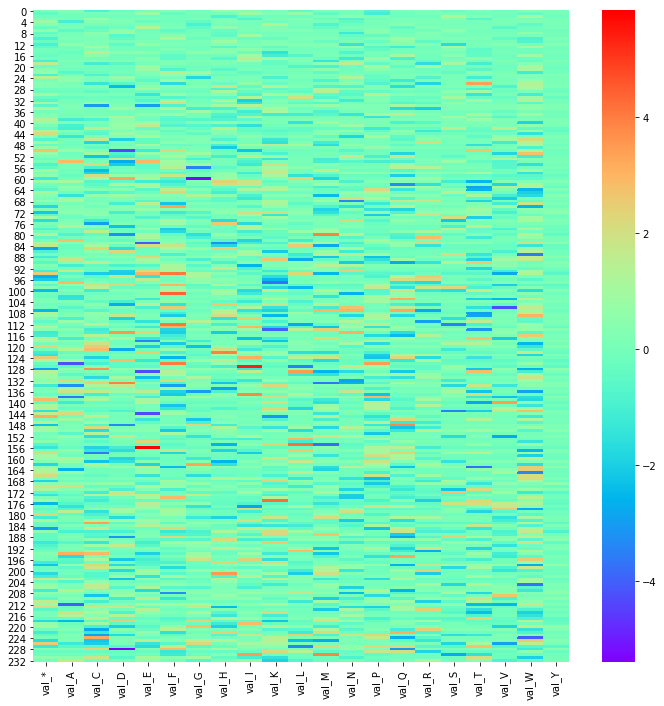

In [197]:
import seaborn as sns
plt.figure(figsize=[12,12])
sns.heatmap(learned_model_im,cmap='rainbow')
plt.show()

In [198]:
row_means_list = []
for mean_index in range(len(learned_model_im)):
    row_means_list.append(np.mean(learned_model_im.loc[mean_index,:]))

In [199]:
for mean_index in range(len(learned_model_im)):
    learned_model_im.loc[mean_index,:] -= row_means_list[mean_index]

In [200]:
learn_model_copy = learned_model_im.copy()

## reweight model

~~Divided all weights by square root of the sum of the squares of all weights~~

In [193]:
rescale_weight = np.sum(np.sum(np.square(learn_model_copy)))**0.5
learn_model_copy = learn_model_copy.copy()/rescale_weight

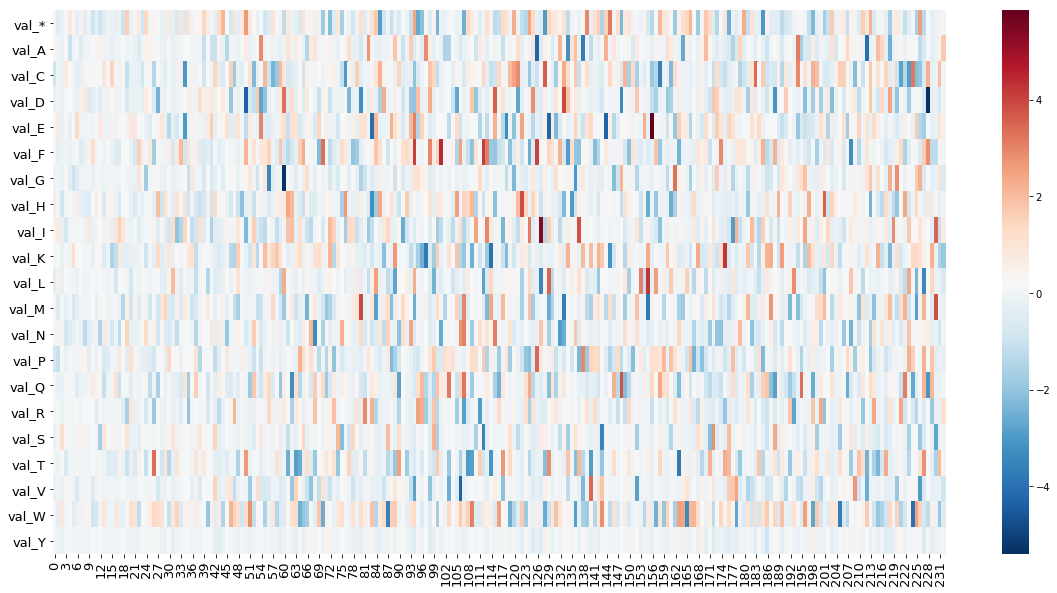

In [201]:
import seaborn as sns
plt.figure(figsize=[20,10])
sns.heatmap(learn_model_copy.T,cmap='RdBu_r')
plt.tick_params(labelsize=13)
plt.show()

## output model 

In [202]:
learn_model_copy.to_csv('learn_gfp_model_no_spurious_seqs_gf.csv',sep='\t')

## end model visualization

In [5]:
sequences = input_data_ordered_raw['AAsequence']
val = input_data_ordered_raw['medianBrightness']

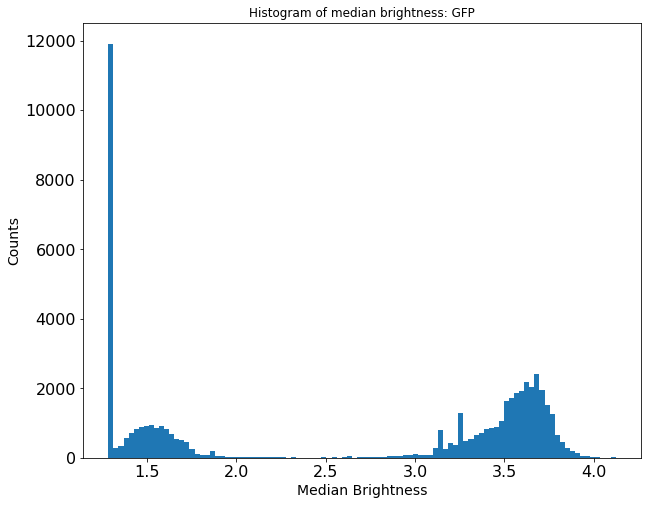

In [6]:
plt.figure(figsize=[10,8])
plt.hist(val,bins=100)
plt.title('Histogram of median brightness: GFP')
plt.xlabel('Median Brightness',fontsize=14)
#plt.xlim([1.2,1.4])
plt.ylabel('Counts',fontsize=14)
plt.tick_params(labelsize=16)
plt.savefig('median_brightness_histogram_gfp.png')
plt.show()

## Check which sequences are clustered around 1.3

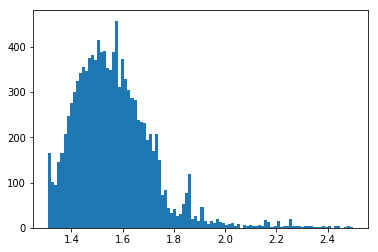

In [64]:
plt.hist(input_data_ordered_raw.loc[(input_data_ordered_raw['medianBrightness']<2.5) & (input_data_ordered_raw['medianBrightness']>1.31)]['medianBrightness'],bins=100)
plt.show()

## make dataframe which excludes sequences below value (some value)

### there are about ~ 10000 of these with the same value around 1.3

In [65]:
#len(input_data_ordered_raw.loc[input_data_ordered_raw['medianBrightness']>2.5])
len(input_data_ordered_raw.loc[(input_data_ordered_raw['medianBrightness']<2.5) & (input_data_ordered_raw['medianBrightness']>1.31)]['medianBrightness'])

11459

In [68]:
#input_df_without_spurious_seqs = input_data_ordered_raw.loc[input_data_ordered_raw['medianBrightness']>2.5].copy()
input_df_without_spurious_seqs = input_data_ordered_raw.loc[(input_data_ordered_raw['medianBrightness']<2.5) & (input_data_ordered_raw['medianBrightness']>1.31)].copy()

In [69]:
input_df_without_spurious_seqs.head()

,AAsequence,HammingDistance,aaMutations,medianBrightness,std
6,KGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFIC...,5,SA108G:SK154E:SF163S:SL192Q:SL193P,1.499573,NaN
19,KGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFIC...,5,SA108T:SK129E:SS145C:SE170G:ST184S,1.318630,NaN
22,KGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFIC...,4,SA108T:SV110G:SE140G:SK207N,1.383828,NaN
23,KGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFIC...,4,SA108V:SE109D:SN210S:SD232N,1.661894,NaN
25,KGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFIC...,2,SA108V:SI150V,1.450932,NaN


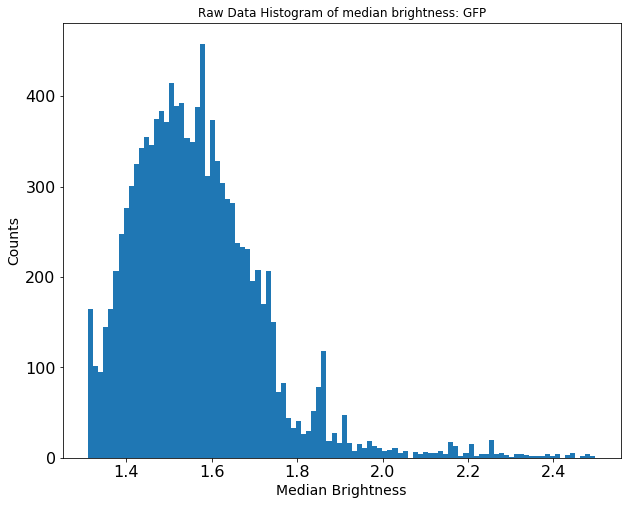

In [70]:
plt.figure(figsize=[10,8])
#plt.hist(input_data_ordered_raw['medianBrightness'],bins=100)
plt.hist(input_df_without_spurious_seqs['medianBrightness'],bins=100)
plt.title('Raw Data Histogram of median brightness: GFP')
plt.xlabel('Median Brightness',fontsize=14)
#plt.xlim([1.2,1.4])
plt.ylabel('Counts',fontsize=14)
plt.tick_params(labelsize=16)
#plt.savefig('raw_median_brightness_histogram_gfp.png')
plt.show()

In [71]:
sequences = input_df_without_spurious_seqs['AAsequence']
val = input_df_without_spurious_seqs['medianBrightness']

In [72]:
len(val)

11459

In [73]:
gfp_df = pd.DataFrame({'seq':sequences,'val':val})

In [74]:
from scipy.stats import percentileofscore

# generate example data
arr = gfp_df['val']

# pre-sort array
arr_sorted =  sorted(arr)

# calculate percentiles using scipy func percentileofscore on each array element
s = pd.Series(arr)
percentiles = s.apply(lambda x: percentileofscore(arr_sorted, x))

/Users/tareen/Library/Python/3.6/lib/python/site-packages/scipy/stats/stats.py:1792: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  pct = (np.mean(a_len[idx]) / n) * 100.0


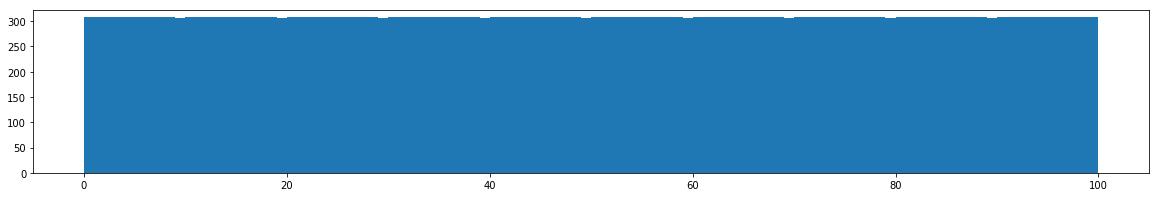

In [16]:
#plt.hist(arr,bins=50)
plt.figure(figsize=[20,3])
plt.hist(percentiles,bins=100)
plt.show()

In [17]:
gfp_df.head()

,seq,val
0,KGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFIC...,3.719212
4,KGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFIC...,3.708478
5,KGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFIC...,3.582764
7,KGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFIC...,3.659013
8,KGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFIC...,3.573855


In [18]:
len(gfp_df)

30691

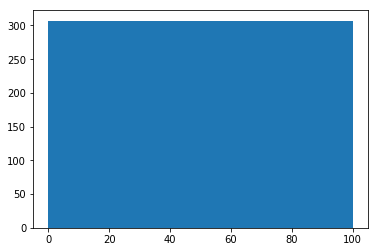

In [20]:
plt.hist(percentiles,bins=100)
plt.show()

In [21]:
#gfp_df['percentiles'] = percentiles
gfp_df['percentiles'] = percentiles

In [57]:
len(gfp_df)

30691

In [56]:
gfp_df.head()

,seq,val,percentiles
0,KGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFIC...,3.719212,83.565215
4,KGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFIC...,3.708478,81.303965
5,KGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFIC...,3.582764,50.399140
7,KGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFIC...,3.659013,68.463067
8,KGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFIC...,3.573855,48.489785


In [58]:
gfp_df.to_csv('gfp_seq_val_percentiles_high_val_seqs.csv',sep='\t')

In [23]:
gfp_df_percentiles = gfp_df.copy()

## Load dataframe with percentiles

In [214]:
gfp_df_percentiles = pd.read_csv('gfp_seq_val_percentiles_no_spurious_seqs.csv')
#gfp_df_percentiles = pd.read_csv('gfp_seq_val_percentiles.csv')
del gfp_df_percentiles['Unnamed: 0']

gfp_df_percentiles.head()

,seq,val,percentiles,additive_trait
0,KGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFIC...,3.719212,88.033215,-0.825169
1,KGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFIC...,3.708478,86.386714,-0.825169
2,KGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFIC...,3.582764,63.883749,-0.825169
3,KGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFIC...,1.499573,9.933571,-0.825169
4,KGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFIC...,3.659013,77.036773,-0.825169


In [173]:
gfp_df_percentiles = gfp_df_percentiles.dropna()

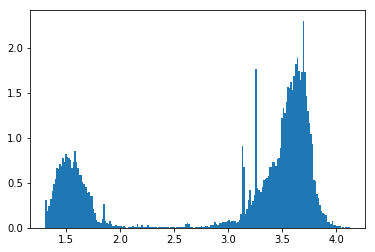

In [215]:
plt.hist(gfp_df_percentiles['val'],bins=200,density=True)
plt.show()

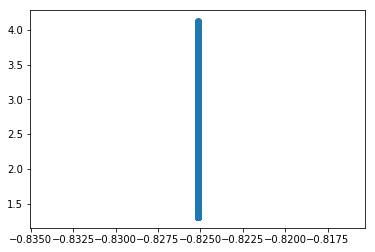

In [217]:
#plt.scatter(gfp_df_percentiles.loc[gfp_df_percentiles['additive_trait']<0.825169]['additive_trait'],gfp_df_percentiles.loc[gfp_df_percentiles['additive_trait']<0.825169]['val'])
#plt.scatter(gfp_df_percentiles.loc[gfp_df_percentiles['val']>1.31]['additive_trait'],gfp_df_percentiles.loc[gfp_df_percentiles['val']>1.31]['val'])
plt.scatter(gfp_df_percentiles['additive_trait'],gfp_df_percentiles['val'])
#plt.ylim([1.2,1.4])
plt.show()

In [156]:
len(gfp_df_percentiles['val'])

54025

In [94]:
len(gfp_df_percentiles.loc[gfp_df_percentiles['additive_trait']<0.825169])

54016

## Load/visualize global episistasis

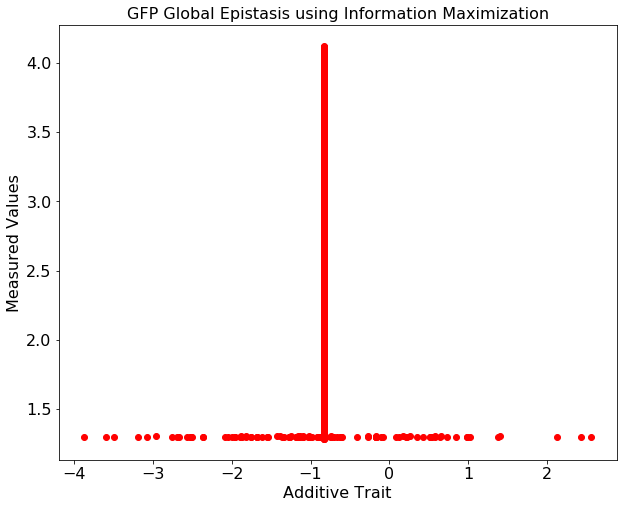

In [208]:
plt.figure(figsize=[10,8])
#plt.scatter(gfp_df_percentiles['additive_trait'],gfp_df_percentiles['val'],s=0.5,color='red',alpha=0.25)
#plt.scatter(gfp_df_percentiles.loc[gfp_df_percentiles['additive_trait']<0.825169]['additive_trait'],gfp_df_percentiles.loc[gfp_df_percentiles['additive_trait']<0.825169]['val'],s=20.0,color='red')
plt.scatter(gfp_df_percentiles['additive_trait'].dropna(),gfp_df_percentiles['val'],color='red')
plt.xlabel('Additive Trait',fontsize=16)
plt.ylabel('Measured Values',fontsize=16)
plt.title('GFP Global Epistasis using Information Maximization',fontsize=16)
plt.tick_params(labelsize=16)
plt.savefig('GFP_global_epistasis_MI_max_no_spurious_seqs.png')
plt.show()

## end load/visualize global episistasis

In [29]:
len(gfp_df_percentiles)

30691

In [30]:
val_scaled = gfp_df_percentiles['val']
#val_scaled = (val_scaled-min(val_scaled))/(max(val_scaled)-min(val_scaled))
gfp_df_percentiles['val_scaled'] = val_scaled

In [31]:
bins_to_use = 20
#counts,bins = np.histogram(gb1_df_10k['val'],bins=bins_to_use)
counts,bins = np.histogram(val_scaled,bins=bins_to_use)

In [32]:
bins

array([2.50058396, 2.58171022, 2.66283647, 2.74396273, 2.82508898,
       2.90621524, 2.98734149, 3.06846775, 3.149594  , 3.23072026,
       3.31184651, 3.39297277, 3.47409902, 3.55522528, 3.63635153,
       3.71747779, 3.79860404, 3.8797303 , 3.96085655, 4.04198281,
       4.12310906])

In [33]:
#temp_df = gb1_df_10k[].copy()
temp_df = gfp_df_percentiles.copy()

In [34]:
len(temp_df['val_scaled'])

30691

In [35]:
for bin_index in range(len(bins)):
    if(bin_index<len(bins)-1):
        print(bin_index,bins[bin_index],bins[bin_index+1])     

0 2.5005839606299998 2.5817102157674996
1 2.5817102157674996 2.662836470905
2 2.662836470905 2.7439627260424997
3 2.7439627260424997 2.82508898118
4 2.82508898118 2.9062152363175
5 2.9062152363175 2.987341491455
6 2.987341491455 3.0684677465925
7 3.0684677465925 3.1495940017299997
8 3.1495940017299997 3.2307202568675
9 3.2307202568675 3.3118465120050002
10 3.3118465120050002 3.3929727671425
11 3.3929727671425 3.47409902228
12 3.47409902228 3.5552252774174997
13 3.5552252774174997 3.636351532555
14 3.636351532555 3.7174777876925003
15 3.7174777876925003 3.79860404283
16 3.79860404283 3.8797302979675
17 3.8797302979675 3.960856553105
18 3.960856553105 4.0419828082425004
19 4.0419828082425004 4.12310906338


## Get sequences and bin numbers

In [36]:
sequence_bins_list = []
# loop over every sequence
for index, row in temp_df.iterrows():
    # for each row, put sequences in the correct bin based on comparing values to bins
    #print(index,row['seq'], row['val'])
    for bin_index in range(len(bins)):
        if(bin_index<len(bins)-1): # do go out of bounds
            if((row['val_scaled']>= bins[bin_index]) and (row['val_scaled']<=bins[bin_index+1])):
                #print('Seq: ',row['seq'],' going in bin: ',bin_index)
                sequence_bins_list.append([row['seq'],bin_index])
                
                

In [37]:
sequence_counts_array = np.array(sequence_bins_list)

In [38]:
len(sequence_counts_array)

30691

In [39]:
sequence_counts_array[:,1]
seq_bin_df = pd.DataFrame({'seq':sequence_counts_array[:,0],'bin':sequence_counts_array[:,1]})
seq_bin_df.head()

,bin,seq
0,15,KGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFIC...
1,14,KGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFIC...
2,13,KGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFIC...
3,14,KGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFIC...
4,13,KGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFIC...


In [40]:
len(seq_bin_df)

30691

In [41]:
print(min(sequence_counts_array[:,1].astype('int')))
print(max(sequence_counts_array[:,1].astype('int')))

0
19


In [42]:
count_cols = []
for bin_index in range(len(bins)-1):
    count_cols.append('ct_'+str(bin_index))

In [43]:
count_cols

['ct_0',
 'ct_1',
 'ct_2',
 'ct_3',
 'ct_4',
 'ct_5',
 'ct_6',
 'ct_7',
 'ct_8',
 'ct_9',
 'ct_10',
 'ct_11',
 'ct_12',
 'ct_13',
 'ct_14',
 'ct_15',
 'ct_16',
 'ct_17',
 'ct_18',
 'ct_19']

In [44]:
# append count columns to the dataframe
#c ount_cols are ['ct_0','ct_1','ct_2','ct_3','ct_4','ct_5','ct_6','ct_7','ct_8','ct_9'] for bins = 10
d = dict.fromkeys(count_cols, 0)
seq_counts_df = seq_bin_df.assign(**d).copy()

In [45]:
seq_counts_df.head()

,bin,seq,ct_0,ct_1,ct_2,ct_3,ct_4,ct_5,ct_6,ct_7,...,ct_10,ct_11,ct_12,ct_13,ct_14,ct_15,ct_16,ct_17,ct_18,ct_19
0,15,KGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFIC...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,14,KGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFIC...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,13,KGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFIC...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,14,KGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFIC...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,13,KGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFIC...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
seq_counts_df = seq_counts_df.copy()
seq_counts_df.reset_index(inplace=True)
del seq_counts_df['index']
seq_counts_df.head()

,bin,seq,ct_0,ct_1,ct_2,ct_3,ct_4,ct_5,ct_6,ct_7,...,ct_10,ct_11,ct_12,ct_13,ct_14,ct_15,ct_16,ct_17,ct_18,ct_19
0,15,KGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFIC...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,14,KGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFIC...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,13,KGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFIC...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,14,KGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFIC...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,13,KGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFIC...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
len(seq_counts_df)

30691

## populate counts columns

In [48]:
number_cols_to_displace = 2

for row_index in range(len(seq_counts_df['bin'])):
    count_col = seq_counts_df.columns[int(seq_counts_df['bin'][row_index])+number_cols_to_displace]
    seq_counts_df.loc[row_index,count_col] = 1

    

In [49]:
seq_counts_df.head(10)

,bin,seq,ct_0,ct_1,ct_2,ct_3,ct_4,ct_5,ct_6,ct_7,...,ct_10,ct_11,ct_12,ct_13,ct_14,ct_15,ct_16,ct_17,ct_18,ct_19
0,15,KGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFIC...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,14,KGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFIC...,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,13,KGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFIC...,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,14,KGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFIC...,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,13,KGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFIC...,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
5,16,KGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFIC...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6,15,KGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFIC...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
7,5,KGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFIC...,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8,13,KGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFIC...,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
9,15,KGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFIC...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [50]:
len(seq_counts_df)

30691

In [51]:
seq_counts_df.to_csv('gfp_input_to_mpathic_no_spurious_seqs.csv',sep='\t')

In [72]:
#temp_df['val_scaled'][0:10000]
additive_trait_df = pd.read_csv('evaluated_model_full.csv',sep='\t')
del additive_trait_df['Unnamed: 0']
additive_trait_df.head()

,ct,ct_0,ct_1,ct_2,ct_3,ct_4,ct_5,ct_6,ct_7,ct_8,ct_9,seq_pro,val
0,1,0,0,0,0,0,0,0,0,1,0,VDGV,0.045543
1,1,0,0,0,0,0,0,0,1,0,0,ADGV,0.045543
2,1,0,0,0,0,0,0,1,0,0,0,CDGV,0.045543
3,1,0,0,0,0,0,0,1,0,0,0,DDGV,0.045543
4,1,0,0,0,0,0,1,0,0,0,0,EDGV,0.045543


In [84]:
len(additive_trait_df['val'])

149359

In [80]:
additive_trait = additive_trait_df['val']
additive_trait_scaled = (additive_trait-min(additive_trait))/(max(additive_trait)-min(additive_trait))

In [81]:
len(additive_trait_scaled)

149359

In [83]:
len(val_scaled)

149361

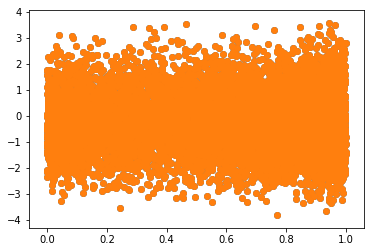

In [247]:
plt.scatter(temp_df['val_scaled'][0:10000],additive_trait_df['val'])
plt.show()